In [1]:
# Reed Whitcraft
# Full-Time
# Project 1

# King County House Sales Exploration
___


> You can't answer a question that hasn't been asked. - Me

Before we explore the King County House Sales data we have been provided, we have to make that data purposeful, and data cannot answer a question that hasn't been asked. So, the first step is to ask ourselves what problem are we trying to solve.  Establishing this question gives us direction, and directionless data wrangling and exploration is a waste of time (and probably money).

For this project, we'll be following a popular approach in data science called **OSEMN**

## OBTAIN

  - Before we can do anything, we have to first define and find our data. We also have to establish our problem and define our business question.
  
## SCRUB

  - Once we have defined our problem and obtained our data, we must inspect and clean our data.  This step often blends with the following step, as we may find that we need to scrub our data after initial exploration.  Here, we'll be looking for: 
  
        (1) null or missing values
        (2) extreme outliers or impractical/impossible values - sometimes, these are placeholders intentionally put into a dataset to represent missing values
        (3) confirm and/or edit the formats of our datatypes - sometimes, numerical information is incorrectly persisted as strings.
        (4) initial inspection of non-continuous data that may be categorical and need to be properly converted before modeling.
    
## SCRUB/EXPLORE

  - Somwhere in the scrub and explore stages, we will want to confirm that our data is normally distributed and not heavily skewed.  Visualizations will help us determine the shape of our data, and if not normal, our data may have to be transformed for our model.
    
## EXPLORE

  - With our data scrubbed, we can now explore what we've found.  Given a target variable, in this case, price, we will be looking for how our feature variables correlate with price.  We'll often create visualizations, including scatterplots, to see if we can see a, hopefully, linear relationship.  Additionally, we'll have to look out for multicollinearity -- that is, when a change in one feature variable is associated with a change in another feature variable.  This is concerning because the foundation of our modeling process is based upon the fact that, when marginally changing one variable with respect to price, all other variables are held constant.  And, if this is not the case, and other variables change, we may not be able to confidently trust the results and accuracy of our model.

## MODEL

 - Having explored our data and narrowed our feature variables, we will begin the modeling process.  We will split our data into testing and training subsets, and we will see if we can construct a model that accurately predicts housing prices given (testing) data we have withheld from our model (trained by the other subset of data).

## INTERPRET

- After modeling, the final step will be to analyze and interpret our results.  We should find out what feature variables are the most influential and whether or not our initial business decision has been answered.  Here, we can also discuss problems we faced and suggestions for future work.


So what are we concerned with? What question do we have and what are we trying to figure out?

Assuming the role of a home owner looking to sell his/her house, how can I appropriately price my house, so that I may get the highest offer, without letting it sit on the market for too long?  Is there anything I can do to increase the value of my house through renovating? Can I price my house at the same price of a similar house in another neighborhood, or should I keep my comparables restricted to my neighborhood, or similar neighborhoods?  


# Part I: OBTAIN & SCRUB
***

### Obtaining Our Data

With our question established, typically, we would have to find our data, whether it be through publicly available services, web scraping, purchase, or another means. Luckily, in this situation, we are dealing with data that was magically delivered to us.

### Scrubbing Our Data

Given the questionable delivery (and creation?) of our data, we cannot consider exploring our question without first assessing the quality of our data and cleaning subsets that may be incorrectly typecasted, erroneous, empty, or impossible.  So, let's load and preview what we have.

In [88]:
# load initial libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [89]:
# load the data
data = pd.read_csv("kc_house_data.csv", index_col="id")

In [90]:
# preview the data
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 3.5+ MB


- One of the first things to notice is that there are a couple sqft_ features, and all are integer types (which is what we would expect), except sqft_basement which is a string. And if we look are the rows returned in data.head(), we can see that sqft_basement is, indeed, supposed to be an integer.

In [92]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Handling Null Values

In [94]:
data.isna().sum() # checking for empty rows

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

- Looks like we have a pretty complete set of data, most columns are not empty/null.
- Looking at the three columns with missing information (waterfront, view, and yr_renovated), my immediate thought is that these may have been intended to be boolean representations of these features, so zeros in yr_renovated would mean that a house was not renovated, and 0 in waterfront would mean that those houses do not have waterfront views. If true, they are categorical in nature, and will want to convert this later if used.
- And after glancing at the stats provided in data.describe(), we can see that this is true for waterfront.

##### Back to sqft_basement - let's see what's actually there

In [95]:
data.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
450.0       103
480.0       103
530.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
550.0        76
780.0        76
650.0        75
240.0        74
680.0        73
380.0        73
360.0        72
          ...  
248.0         1
2610.0        1
1920.0        1
2350.0        1
588.0         1
1024.0        1
2390.0        1
602.0         1
1960.0        1
20.0          1
935.0         1
2120.0        1
225.0         1
2310.0        1
266.0         1
861.0         1
2400.0        1
1008.0        1
295.0         1
4820.0        1
143.0         1
2360.0        1
1284.0        1
1548.0        1
2240.0        1
276.0         1
875.0         1
516.0         1
2730.0        1
243.0         1
Name: sqft_basement, Len

- As expected, numbers stored as strings; however, there are some "?" placeholders instead of 0
- This '?' might mean that there was no record of the square footage of the basements for these houses but that these houses had basements (thus, purposefully distinguished from 0), or it may mean that this information was not available.
- Given this, we could either replace these values with an average of our data set, or 0. Given that it's only a small subset of our data (454), it's safe to clean this up. 


In [96]:
questionable_basements = data.loc[data['sqft_basement'] == '?']
num_questionable_basements = len(questionable_basements)
print("number of questionable basements:", num_questionable_basements)

number of questionable basements: 454


In [97]:
data.loc[data['sqft_basement'] == '?', 'sqft_basement'] = 0
data.sqft_basement.describe()

count     21597
unique      304
top         0.0
freq      12826
Name: sqft_basement, dtype: object

In [98]:
data.sqft_basement = data.sqft_basement.astype(np.float64) # change typing

In [99]:
data.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

- Again, looks like the most common value is 0, which should represent that a house was not renovated. Going to change the missing values to this.

In [100]:
data.yr_renovated.fillna(0, inplace=True)

In [101]:
data.waterfront.fillna(0, inplace=True) # fill null values in waterfront as well

In [102]:
data.view.fillna(0, inplace=True) # fill null values in view as well as there are only 63 missing

In [103]:
data.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [104]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,285.716581,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,439.819830,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# EXPLORE
___
    - After some initial cleaning, let's explore our data and look for outliers, multicollinearity, potential categorical variables

### Looking for Outliers

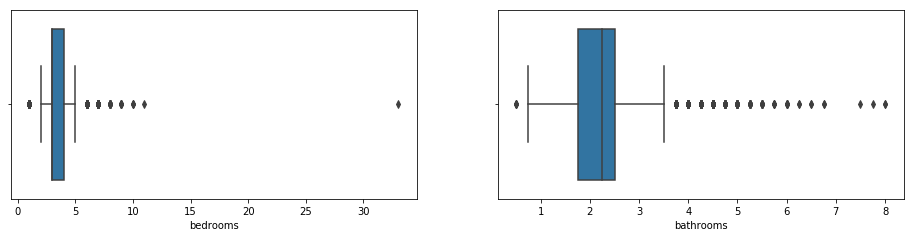

In [105]:
plt.figure(figsize=(16,16))
plt.subplot(421)
sns.boxplot(x='bedrooms', data=data)
plt.subplot(422)
sns.boxplot(x='bathrooms', data=data)

We have at least one significant outlier with over 30 bedrooms, and a couple others well above the 75% threshold that contains the rest of the observations.  Similarly, we have even more bathroom outliers.  These affects the mean and will negatively impact our model, so let's address these outliers here.

In [106]:
data = data[data.bathrooms < 6]
data = data[data.bedrooms < 10]

Taking another look at the boxplots for these:

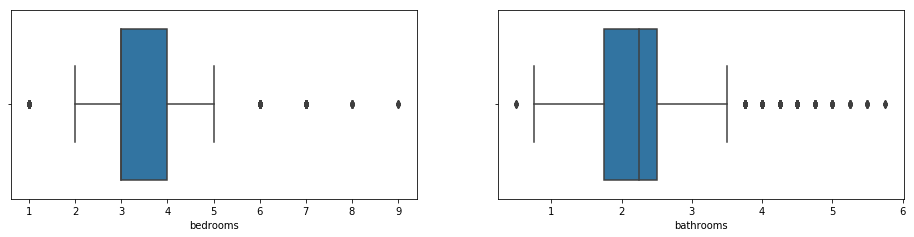

In [107]:
plt.figure(figsize=(16,16))
plt.subplot(421)
sns.boxplot(x='bedrooms', data=data)
plt.subplot(422)
sns.boxplot(x='bathrooms', data=data)

Still more outliers than ideal, so will keep bathrooms < 5 and bedrooms < 7

In [108]:
data = data[data.bathrooms < 5]
data = data[data.bedrooms < 7]

Now let's take a look at square feet:

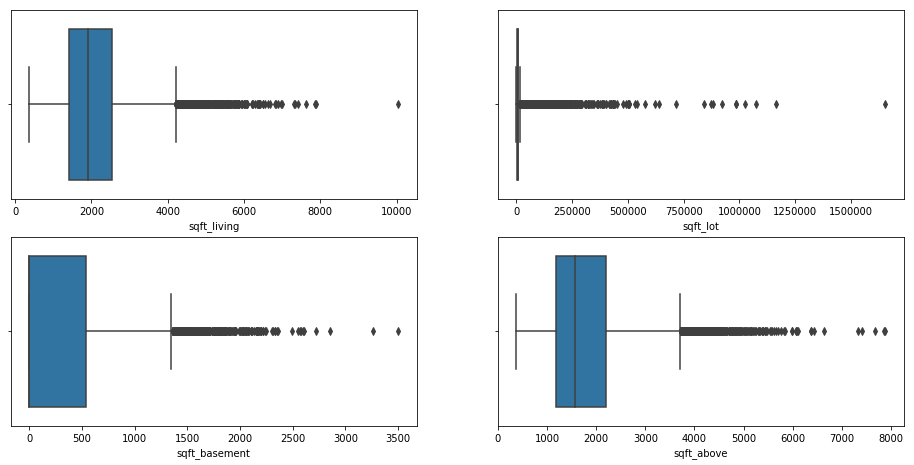

In [109]:
plt.figure(figsize=(16,16))
plt.subplot(421)
sns.boxplot(x='sqft_living', data=data)
plt.subplot(422)
sns.boxplot(x='sqft_lot', data=data)
plt.subplot(423)
sns.boxplot(x='sqft_basement', data=data)

plt.subplot(424)
sns.boxplot(x='sqft_above', data=data)
# plt.subplot(423)
# sns.boxplot(x='sqft_living15', data=data)

There are a handful of outliers in the square footage attributes, and we can see, again, that a lot of houses have 0 basement values.  My first thought is to, first, remove some of the outliers on the right, and then potentially remove basement as a feature variable (once we check for its correlation with price and multicollinearity)

In [110]:
data = data[data.sqft_living < 7000]
data = data[data.sqft_lot < 750000]
data = data[data.sqft_above < 5000]

Let's take a look at these again:

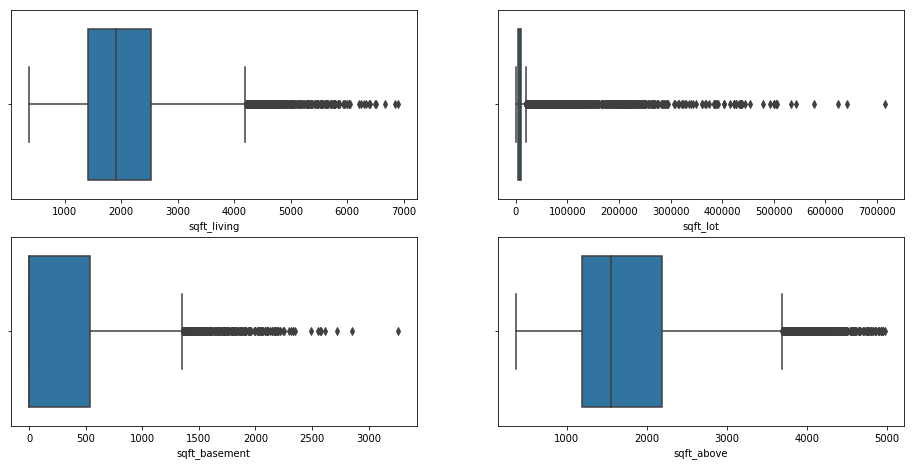

In [111]:
plt.figure(figsize=(16,16))
plt.subplot(421)
sns.boxplot(x='sqft_living', data=data)
plt.subplot(422)
sns.boxplot(x='sqft_lot', data=data)
plt.subplot(423)
sns.boxplot(x='sqft_basement', data=data)

plt.subplot(424)
sns.boxplot(x='sqft_above', data=data)
# plt.subplot(423)
# sns.boxplot(x='sqft_living15', data=data)

Square feet lot does not look great, and square feet living looks better, but probably could remove a couple more of the outliers.  

In [112]:
data = data[data.sqft_living < 5500]

Now, let's check price:

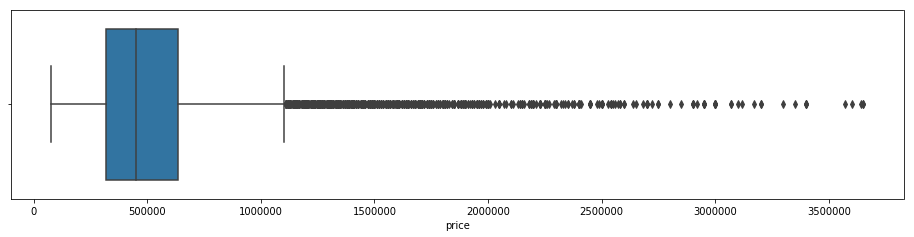

In [113]:
plt.figure(figsize=(16,16))
plt.subplot(411)
sns.boxplot(x='price', data=data)

Price has some outliers. 

In [114]:
data.price.describe()

count    2.135900e+04
mean     5.270893e+05
std      3.229164e+05
min      7.800000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.350000e+05
max      3.650000e+06
Name: price, dtype: float64

In [116]:
data = data[data.price < 2000000]
print(len(data))

21220


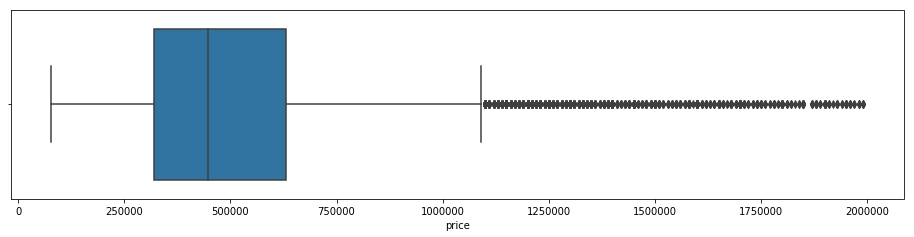

In [117]:
plt.figure(figsize=(16,16))
plt.subplot(411)
sns.boxplot(x='price', data=data)

In [118]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.122000e+04,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000
mean,5.140820e+05,3.345193,2.084437,2030.140292,14285.118238,1.487418,0.004760,0.211074,3.409755,7.612677,1749.379218,275.043167,1970.891989,66.778746,98078.232705,47.559357,-122.214321,1962.954571,12419.682846
std,2.790095e+05,0.866956,0.724286,820.293776,33718.567935,0.538653,0.068828,0.720513,0.649969,1.114019,758.937373,420.879356,29.302902,358.935301,53.507146,0.139202,0.140884,654.080995,25342.885569
min,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.200000e+05,3.000000,1.500000,1420.000000,5013.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.468575,-122.329000,1480.000000,5092.000000
50%,4.480000e+05,3.000000,2.250000,1900.000000,7560.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1550.000000,0.000000,1975.000000,0.000000,98065.000000,47.570700,-122.231000,1830.000000,7587.500000
75%,6.300000e+05,4.000000,2.500000,2510.000000,10490.250000,2.000000,0.000000,0.000000,4.000000,8.000000,2170.000000,530.000000,1996.000000,0.000000,98118.000000,47.678500,-122.125000,2330.000000,10000.000000
max,1.990000e+06,6.000000,4.750000,5490.000000,715690.000000,3.500000,1.000000,4.000000,5.000000,13.000000,4980.000000,2720.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,560617.000000


I might want to come back here and do a little more data handling, but for now, let's look at multicollinearity to see if any of these variables can be removed, so that we aren't spending time cleaning things that won't even be used.  Probably could have considered doing this earlier, though we'll have to see.

## Multicollinearity

In [119]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.315790,0.491436,0.663652,0.083249,0.271981,0.146488,0.336310,0.042240,0.669337,0.562904,0.274343,0.053163,0.111834,-0.038320,0.371541,0.029124,0.588312,0.069032
bedrooms,0.315790,1.000000,0.511055,0.601593,0.030105,0.172889,-0.022797,0.056877,0.024718,0.356560,0.487441,0.285649,0.172176,0.010511,-0.162729,-0.022165,0.145306,0.402254,0.024958
bathrooms,0.491436,0.511055,1.000000,0.732463,0.072528,0.508288,0.017935,0.138740,-0.131386,0.642955,0.655586,0.239430,0.530589,0.039911,-0.206164,0.013540,0.233966,0.549410,0.065585
sqft_living,0.663652,0.601593,0.732463,1.000000,0.170365,0.352049,0.036157,0.222823,-0.064238,0.742081,0.859040,0.391944,0.340108,0.041797,-0.204357,0.040876,0.259014,0.753418,0.165438
sqft_lot,0.083249,0.030105,0.072528,0.170365,1.000000,-0.019833,0.025842,0.071996,-0.005226,0.107950,0.179142,0.008778,0.056404,0.009984,-0.143057,-0.102347,0.246761,0.160120,0.772076
floors,0.271981,0.172889,0.508288,0.352049,-0.019833,1.000000,0.007336,0.009090,-0.268490,0.457680,0.534246,-0.271993,0.495988,0.001746,-0.058390,0.046473,0.126061,0.271508,-0.023538
waterfront,0.146488,-0.022797,0.017935,0.036157,0.025842,0.007336,1.000000,0.339913,0.015396,0.031420,0.017230,0.038550,-0.036244,0.074366,0.043848,-0.024300,-0.049484,0.043676,0.031012
view,0.336310,0.056877,0.138740,0.222823,0.071996,0.009090,0.339913,1.000000,0.044350,0.198853,0.107077,0.235976,-0.066260,0.087223,0.097518,-0.003373,-0.085064,0.239506,0.064401
condition,0.042240,0.024718,-0.131386,-0.064238,-0.005226,-0.268490,0.015396,0.044350,1.000000,-0.154855,-0.170374,0.175872,-0.359291,-0.056432,-0.001288,-0.016009,-0.103032,-0.099082,0.000637
grade,0.669337,0.356560,0.642955,0.742081,0.107950,0.457680,0.031420,0.198853,-0.154855,1.000000,0.734776,0.118699,0.462525,0.006718,-0.183198,0.108640,0.204493,0.695365,0.102848


In [120]:
abs(data.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


Text(0.5, 1.0, 'Feature Correlation')

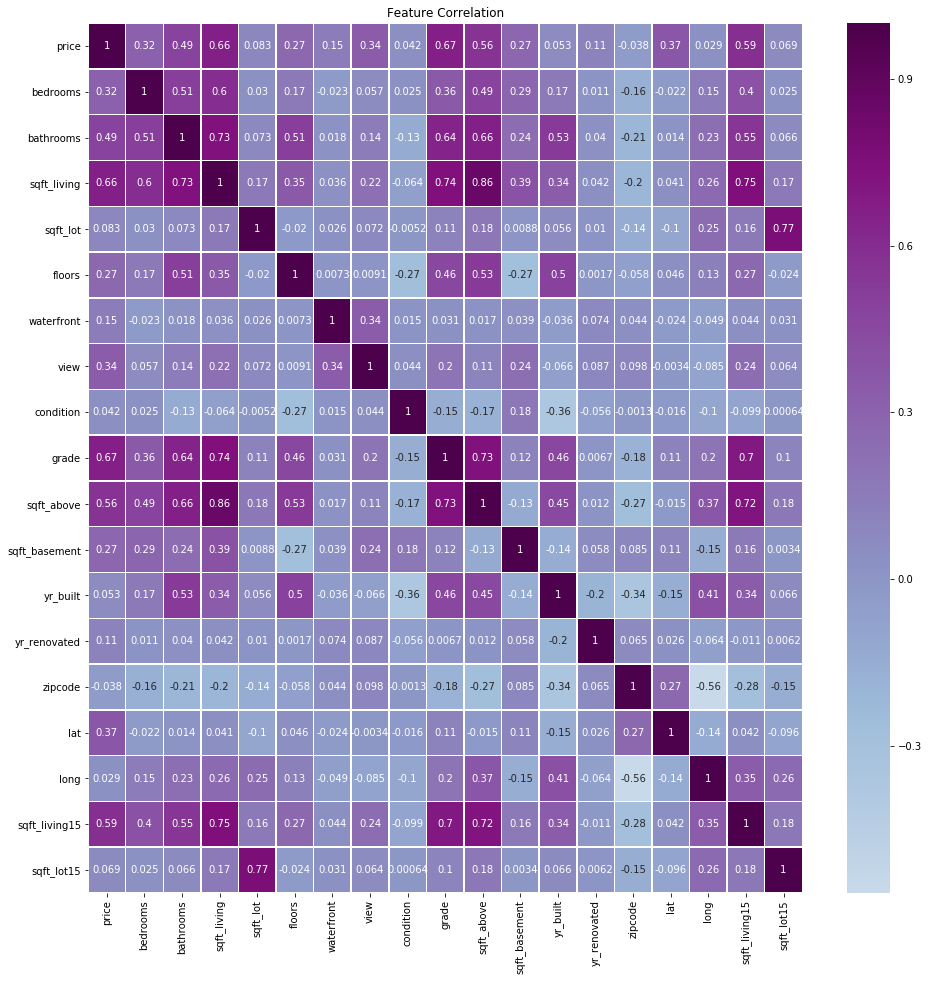

In [121]:
f, ax = plt.subplots(figsize=(16,16))
sns.heatmap(data.corr(), annot=True, center=0, linewidth=.5, ax=ax, cmap="BuPu")
plt.title('Feature Correlation')

Here, we are looking for darker values, which translate to features that have higher correlation.  Greater than 0.75 is a sign of multicollinearity. 
    - The highest correlation between features is 0.86, between sqft_above and sqft_living. This makes sense because sqft_living includes sqft_above.
    - We can see that the pairs sqft_lot/sqft_lot15 and sqft_living/sqft_living15 have high correlation, which, again makes sense.  We'll have to see if we want to remove one of each later on.
    
For now, I am going to remove sqft_above.

In [122]:
data.drop('sqft_above', axis=1, inplace=True)

Let's take a look at grade and condition, which sound like categorical variables.

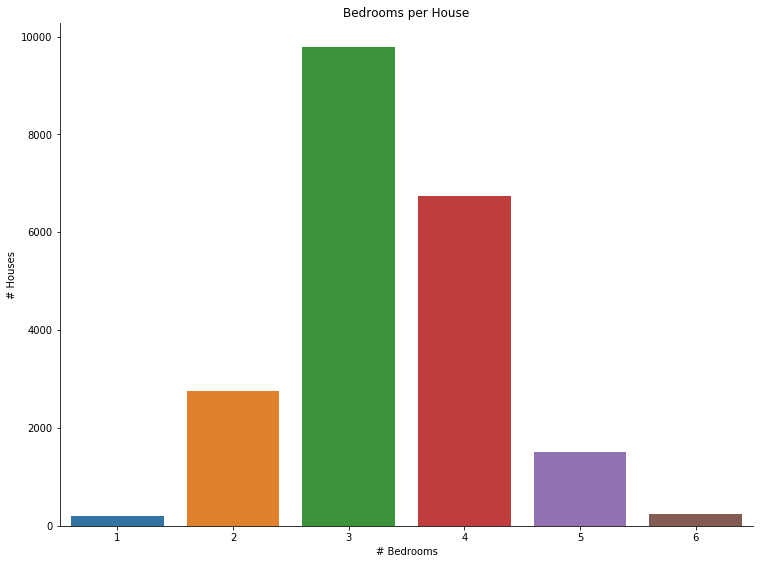

In [123]:
sns.catplot(data=data, x='bedrooms', y=None, kind='count')
plt.title("Bedrooms per House")
plt.xlabel("# Bedrooms")
plt.ylabel("# Houses")
plt.gcf().set_size_inches(11.7, 8.27)

Looks fairly normally distributed, with the most common number of bedrooms per house being 3-4. Without the outliers, this looks good.

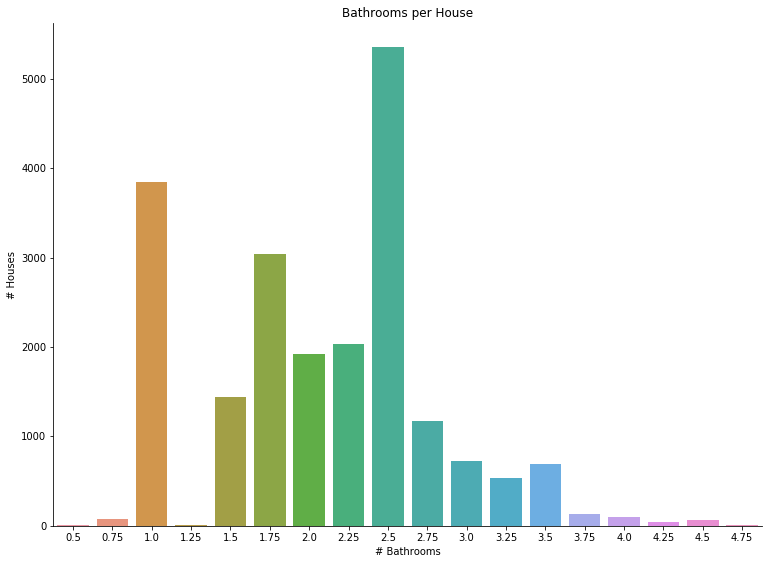

In [124]:
sns.catplot(data=data, x='bathrooms', y=None, kind='count')
plt.title("Bathrooms per House")
plt.xlabel("# Bathrooms")
plt.ylabel("# Houses")
plt.gcf().set_size_inches(11.7, 8.27)

A majority of the bathrooms are between 1.5 and 2.5, with tails on either end. There's a big spike for 1 bathrooms, and this is probably because of apartments and 1-2 bedroom smaller houses might only have 1 bathroom.  

Text(-2.450000000000003, 0.5, '# Houses')

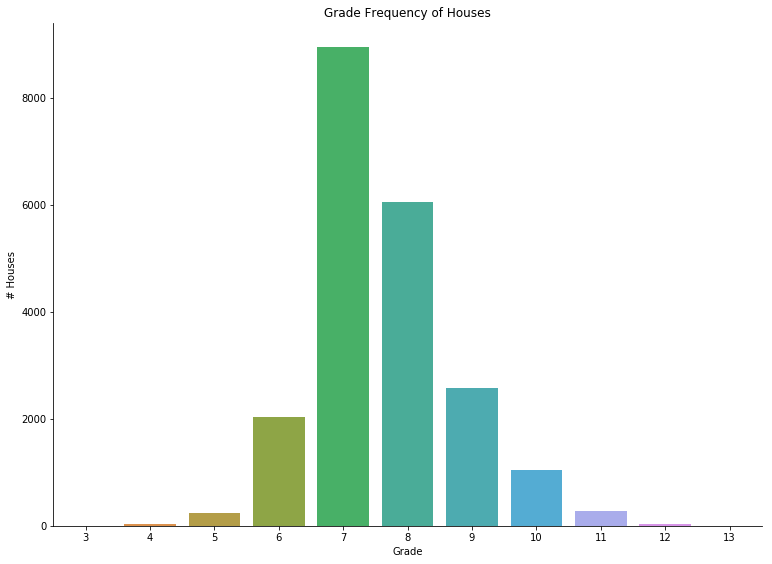

In [125]:
sns.catplot(data=data, x='grade', y=None, kind='count')
plt.gcf().set_size_inches(11.7, 8.27)
plt.title("Grade Frequency of Houses")
plt.xlabel("Grade")
plt.ylabel("# Houses")

Relatively normal distribution of housing grades, with the most coommon values around 7-8.  Fairly expectable.

Text(-8.825000000000003, 0.5, '# Houses')

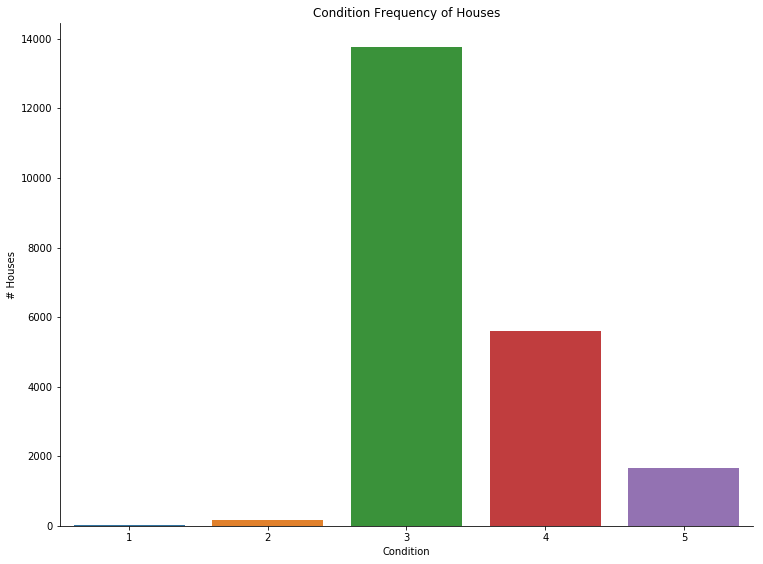

In [126]:
sns.catplot(data=data, x='condition', y=None, kind='count')
plt.gcf().set_size_inches(11.7, 8.27)
plt.title("Condition Frequency of Houses")
plt.xlabel("Condition")
plt.ylabel("# Houses")


Majority of houses have the 'average' condition (3), with more houses getting better condition ratings (4,5) than houses scoring below (1,2).  

#### Looking at latitude and longitude of house sales

<Figure size 864x864 with 0 Axes>

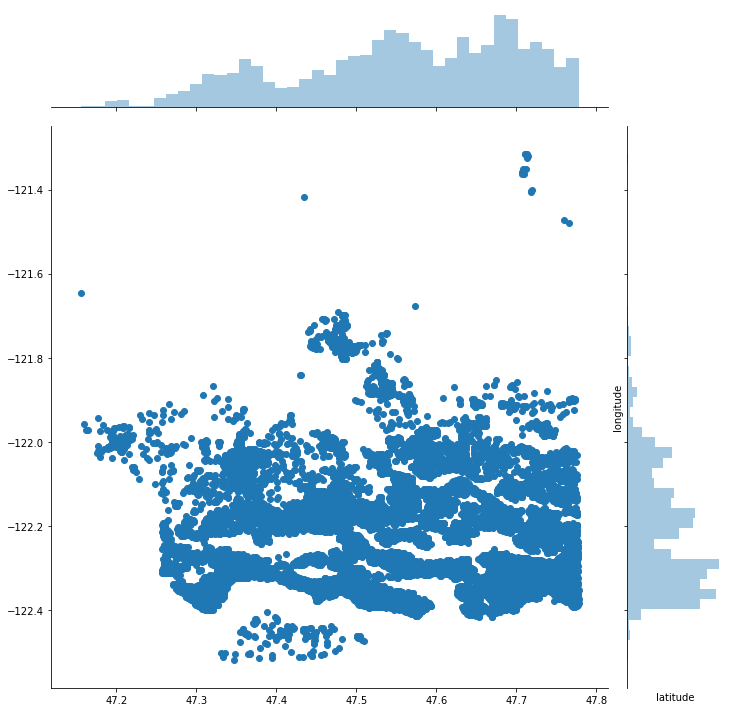

In [127]:
plt.figure(figsize=(12,12))
sns.jointplot(x=data.lat.values, y=data.long.values, height=10)
plt.ylabel('longitude')
plt.xlabel('latitude')
plt.show()

From the histograms on the top and right side, we can see that some areas (mostly the bottom right) sell more frequently than other areas. Maybe this is a more densely populated area, or an area that was just developed, or something else we just don't know yet.

Plotting scatterplots with y, the dependent variable, price. And for the independent variables, we'll take a look at square feet, # of bathrooms, floors, and some other ones we think might have some relationship with a house's price

Text(0, 0.5, 'Price')

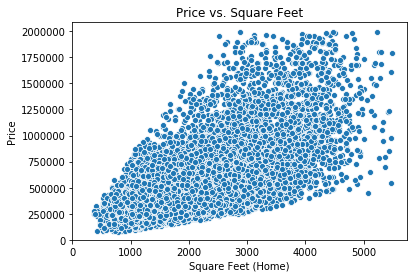

In [128]:
ax = sns.scatterplot(x="sqft_living", y="price", data=data)
plt.xlim(0,None)
plt.ylim(0,None)
plt.title("Price vs. Square Feet")
plt.xlabel("Square Feet (Home)")
plt.ylabel("Price")

Text(0.5, 1.0, 'Price vs. Floors')

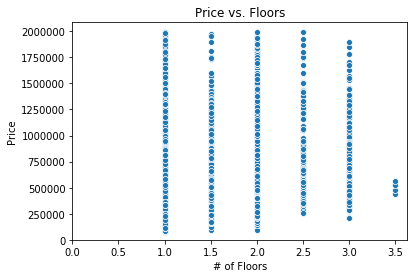

In [129]:
sns.scatterplot(x='floors', y='price', data=data)
plt.xlim(0,None)
plt.ylim(0,None)
plt.xlabel("# of Floors")
plt.ylabel("Price")
plt.title("Price vs. Floors")

Text(0.5, 1.0, 'Price vs. Grade')

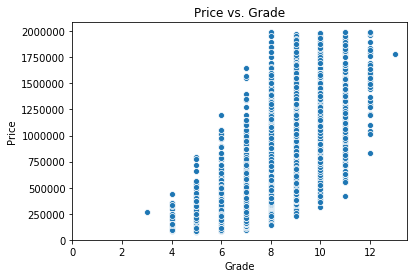

In [130]:
sns.scatterplot(x='grade', y='price', data=data)
plt.xlim(0,None)
plt.ylim(0,None)
plt.xlabel("Grade")
plt.ylabel("Price")
plt.title("Price vs. Grade")


Text(0.5, 1.0, 'Price vs. Condition')

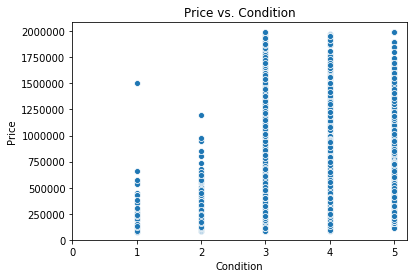

In [131]:
sns.scatterplot(x='condition', y='price', data=data)
plt.xlim(0,None)
plt.ylim(0,None)
plt.xlabel("Condition")
plt.ylabel("Price")
plt.title("Price vs. Condition")


We can clearly see that there is a positive relationship between square feet and price.
We can also see a positive relationship between condition, grade, floors and price.  We also reconfirm that (grade, condition) are not continuous variables and we may need to change them to be categorical when considering their inclusion into our model.

Text(0.5, 1.0, 'Price vs. Zipcode')

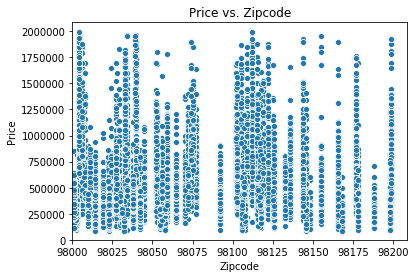

In [132]:
sns.scatterplot(x='zipcode', y='price', data=data)
plt.xlim(98000,None)
plt.ylim(0,None)
plt.xlabel("Zipcode")
plt.ylabel("Price")
plt.title("Price vs. Zipcode")

We can see that some zipcodes have higher selling prices than others.  This makes sense as location, and neighborhood amenities/features is often considered to be associated with a house's value and desirability.

In [133]:
corr_matrix = data.corr()
corr_matrix['price'].sort_values(ascending=False)

price            1.000000
grade            0.669337
sqft_living      0.663652
sqft_living15    0.588312
bathrooms        0.491436
lat              0.371541
view             0.336310
bedrooms         0.315790
sqft_basement    0.274343
floors           0.271981
waterfront       0.146488
yr_renovated     0.111834
sqft_lot         0.083249
sqft_lot15       0.069032
yr_built         0.053163
condition        0.042240
long             0.029124
zipcode         -0.038320
Name: price, dtype: float64

As expected, sqft and grade have a high correlation with price (you get more area for more money, and you pay more money for a better quality (grade) house.

## HANDLING CATEGORICAL VARIABLES

    - Waterfront (true or false) - categorical
    - Condition (non continuous scale) - categorical
    - Grade (non continuous scale) - categorical
    - View = categorical
    - Bedrooms/Bathrooms/Floors (non continuous) - categorical
    - Year renovated - consider converting to category with it being either True/False

In [134]:
# changing data type to category, then converting

data['bedrooms'] = data['bedrooms'].astype('category')
bedrooms = pd.get_dummies(data['bedrooms'], prefix='br', drop_first=True)

data['bathrooms'] = data['bathrooms'].astype('category')
bathrooms = pd.get_dummies(data['bathrooms'], prefix='bath', drop_first=True)

data['floors'] = data['floors'].astype('category')
floors = pd.get_dummies(data['floors'], prefix='flr', drop_first=True)

data['condition'] = data['condition'].astype('category')
condition = pd.get_dummies(data['condition'], prefix='cd', drop_first=True)

data['grade'] = data['grade'].astype('category')
grade = pd.get_dummies(data['grade'], prefix='grd', drop_first=True)

data['waterfront'] = data['waterfront'].astype('category')
waterfront = pd.get_dummies(data['waterfront'], prefix='wf', drop_first=True)

data['view'] = data['view'].astype('category')
view = pd.get_dummies(data['view'], prefix='vw', drop_first=True)


Having converted these features into categories, let's add them to our dataset, then remove the old ones

In [135]:
data = pd.concat([data,bedrooms, bathrooms, floors, condition, grade, waterfront, view], axis=1)
len(data)

21220

In [136]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'br_2', 'br_3', 'br_4', 'br_5', 'br_6', 'bath_0.75',
       'bath_1.0', 'bath_1.25', 'bath_1.5', 'bath_1.75', 'bath_2.0',
       'bath_2.25', 'bath_2.5', 'bath_2.75', 'bath_3.0', 'bath_3.25',
       'bath_3.5', 'bath_3.75', 'bath_4.0', 'bath_4.25', 'bath_4.5',
       'bath_4.75', 'flr_1.5', 'flr_2.0', 'flr_2.5', 'flr_3.0', 'flr_3.5',
       'cd_2', 'cd_3', 'cd_4', 'cd_5', 'grd_4', 'grd_5', 'grd_6', 'grd_7',
       'grd_8', 'grd_9', 'grd_10', 'grd_11', 'grd_12', 'grd_13', 'wf_1.0',
       'vw_1.0', 'vw_2.0', 'vw_3.0', 'vw_4.0'],
      dtype='object')

In [137]:
data.drop(['bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'waterfront', 'view'], axis=1, inplace=True)

In [138]:
data.columns

Index(['date', 'price', 'sqft_living', 'sqft_lot', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'br_2', 'br_3', 'br_4', 'br_5', 'br_6', 'bath_0.75', 'bath_1.0',
       'bath_1.25', 'bath_1.5', 'bath_1.75', 'bath_2.0', 'bath_2.25',
       'bath_2.5', 'bath_2.75', 'bath_3.0', 'bath_3.25', 'bath_3.5',
       'bath_3.75', 'bath_4.0', 'bath_4.25', 'bath_4.5', 'bath_4.75',
       'flr_1.5', 'flr_2.0', 'flr_2.5', 'flr_3.0', 'flr_3.5', 'cd_2', 'cd_3',
       'cd_4', 'cd_5', 'grd_4', 'grd_5', 'grd_6', 'grd_7', 'grd_8', 'grd_9',
       'grd_10', 'grd_11', 'grd_12', 'grd_13', 'wf_1.0', 'vw_1.0', 'vw_2.0',
       'vw_3.0', 'vw_4.0'],
      dtype='object')

In [139]:
data.head()

,date,price,sqft_living,sqft_lot,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,...,grd_9,grd_10,grd_11,grd_12,grd_13,wf_1.0,vw_1.0,vw_2.0,vw_3.0,vw_4.0
id,,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,1180,5650,0.0,1955,0.0,98178,47.5112,-122.257,...,0,0,0,0,0,0,0,0,0,0
6414100192,12/9/2014,538000.0,2570,7242,400.0,1951,1991.0,98125,47.7210,-122.319,...,0,0,0,0,0,0,0,0,0,0
5631500400,2/25/2015,180000.0,770,10000,0.0,1933,0.0,98028,47.7379,-122.233,...,0,0,0,0,0,0,0,0,0,0
2487200875,12/9/2014,604000.0,1960,5000,910.0,1965,0.0,98136,47.5208,-122.393,...,0,0,0,0,0,0,0,0,0,0
1954400510,2/18/2015,510000.0,1680,8080,0.0,1987,0.0,98074,47.6168,-122.045,...,0,0,0,0,0,0,0,0,0,0


### Categorize houses into a location/neighborhood-dependent tier

- Generally, one can assume that similar houses in a single neighborhood have similar selling prices.  But when compared to similar houses in *different* neighborhoods (like one's that have a higher crime rate, wealthier neighborhoods), they don't really compare.  
- Additionally, when buying or selling a house, members of both parties are often interested in price/sqft - as different neighborhoods can have different ranges (like we see in New York City) - and you can compare prices of houses in the same neighborhood.
- And, right now, we have all these houses being considered the same way, so instead of trying to map out zipcodes, I am going to:

1. Add a column of Price/SqFt to our data.
2. Group houses by zipcode, and find the mean price per square feet for our zipcodes
2. Split zipcodes into three types of "neighborhoods" or "groups" 
  - Zipcodes that have sold below the average price (cheaper areas)
  - Zipcodes that sell above the average price, but not often (don't want to have their values overrepresented)
  - Zipcodes that sell above the average price, and more frequently.  
3. Categorize these groupings as "cheap", "expensive low volume", and "expensive high volume" 
4. With this, I can drop zipcodes from our dataset, and ignore longitude and latitude, as that should also be encapsulated in the zipcode pricing groupings

In [140]:
data['price_per_sqft'] = data['price']/data['sqft_living']

Text(0, 0.5, 'Frequency')

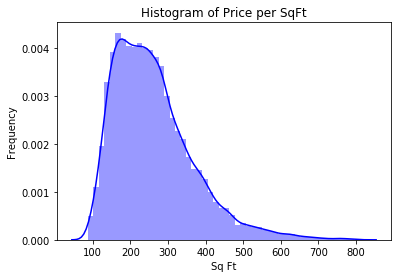

In [141]:
plt.figure()
sns.distplot(data['price_per_sqft'], hist=True, kde=True, color='blue')
plt.title('Histogram of Price per SqFt')
plt.xlabel('Sq Ft')
plt.ylabel('Frequency')

In [142]:
data = data.reset_index() # bring back the id column so we can access it

In [143]:
frequency = data.groupby('zipcode').count()['id']
mean = data.groupby('zipcode').mean()['price_per_sqft']
cluster = pd.concat([frequency, mean], axis=1)

In [144]:
cluster['zipcode'] = cluster.index

In [145]:
cluster.columns = ['frequency', 'price_per_sqft', 'zipcode']
cluster.describe()

,frequency,price_per_sqft,zipcode
count,70.000000,70.000000,70.000000
mean,303.142857,265.649791,98077.300000
std,142.085225,89.315322,56.622408
min,29.000000,148.780767,98001.000000
25%,201.250000,192.676573,98029.250000
50%,277.500000,249.485592,98067.500000
75%,403.000000,314.146865,98117.750000
max,599.000000,543.765469,98199.000000


Looks like the mean is ~$250/SqFt so we will divide the zipcodes here, then split the higher priced groups by the mean frequency (277), and categorize ones below that as lower volume, and ones above as higher volume.

In [146]:
# zipcodes where mean price per square foot is less than overall mean price per square foot
cluster_cheap = cluster[cluster.price_per_sqft < 250]
cluster_cheap.index

Int64Index([98001, 98002, 98003, 98010, 98011, 98014, 98019, 98022, 98023,
            98024, 98028, 98030, 98031, 98032, 98038, 98042, 98045, 98055,
            98056, 98058, 98059, 98065, 98072, 98077, 98092, 98106, 98108,
            98146, 98148, 98155, 98166, 98168, 98178, 98188, 98198],
           dtype='int64', name='zipcode')

In [147]:
cluster_temp = cluster[cluster.price_per_sqft >= 250]
cluster_expensive_low_volume = cluster_temp[cluster_temp.frequency < 277]
cluster_expensive_low_volume.index # zipcodes that sell for greater than mean price per sqft, but sell less frequently than the mean # sold

Int64Index([98005, 98007, 98008, 98039, 98040, 98070, 98102, 98105, 98107,
            98109, 98112, 98119, 98136, 98177],
           dtype='int64', name='zipcode')

In [148]:
cluster_expensive_high_volume = cluster_temp[cluster_temp.frequency >= 277]
cluster_expensive_high_volume.index #zipcodes that sell greater than mean price per sqft, and more frequently

Int64Index([98004, 98006, 98027, 98029, 98033, 98034, 98052, 98053, 98074,
            98075, 98103, 98115, 98116, 98117, 98118, 98122, 98125, 98126,
            98133, 98144, 98199],
           dtype='int64', name='zipcode')

In [149]:
len(cluster_cheap.index) + len(cluster_expensive_low_volume.index) + len(cluster_expensive_high_volume.index)
# cluster counts = total zipcodes in dataset, so all are included
# now want to add a column (categorical) that groups these zipcodes into their respective tiers

70

In [150]:
def get_zipcode_category(zipcode):
    if zipcode in cluster_cheap.index:
        return 'cheap'
    elif zipcode in cluster_expensive_low_volume.index:
        return 'expensive_low_volume'
    else:
        return 'expensive_high_volume'    

In [151]:
data['zipcode_type'] = data.zipcode.apply(get_zipcode_category)

In [152]:
data.head()

,id,date,price,sqft_living,sqft_lot,sqft_basement,yr_built,yr_renovated,zipcode,lat,...,grd_11,grd_12,grd_13,wf_1.0,vw_1.0,vw_2.0,vw_3.0,vw_4.0,price_per_sqft,zipcode_type
0,7129300520,10/13/2014,221900.0,1180,5650,0.0,1955,0.0,98178,47.5112,...,0,0,0,0,0,0,0,0,188.050847,cheap
1,6414100192,12/9/2014,538000.0,2570,7242,400.0,1951,1991.0,98125,47.7210,...,0,0,0,0,0,0,0,0,209.338521,expensive_high_volume
2,5631500400,2/25/2015,180000.0,770,10000,0.0,1933,0.0,98028,47.7379,...,0,0,0,0,0,0,0,0,233.766234,cheap
3,2487200875,12/9/2014,604000.0,1960,5000,910.0,1965,0.0,98136,47.5208,...,0,0,0,0,0,0,0,0,308.163265,expensive_low_volume
4,1954400510,2/18/2015,510000.0,1680,8080,0.0,1987,0.0,98074,47.6168,...,0,0,0,0,0,0,0,0,303.571429,expensive_high_volume


Now let's take a look at square feet vs. price, color-coded by zipcode type

Text(0, 0.5, 'Price')

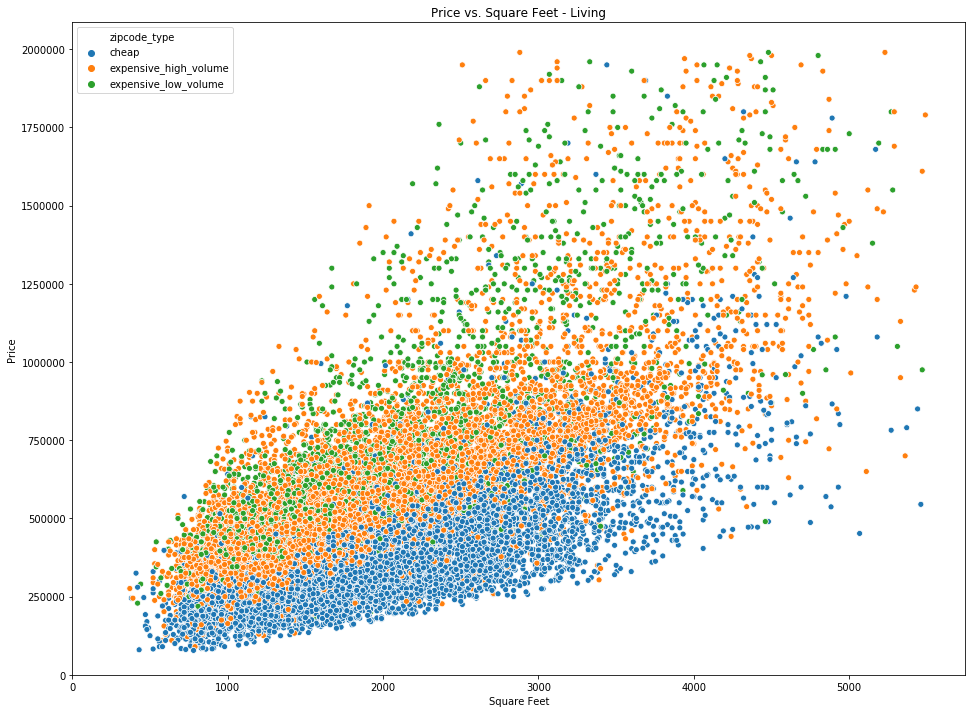

In [154]:
plt.figure(figsize=(16,12))
ax = sns.scatterplot(x="sqft_living", y="price", data=data, hue="zipcode_type")
plt.xlim(0,None)
plt.ylim(0,None)
plt.title("Price vs. Square Feet - Living")
plt.xlabel("Square Feet")
plt.ylabel("Price")

Better than expected.  We can see that the different zipcode groups fall into distinct and different price ranges.  We can also see that houses in each group span the full range of square feet options, and the ones in the cheaper zipcodes sell for noticeably less.

We can also see that the low volume, more expensive houses have, generally, higher prices than the high volume, more expensive houses - so it's a good thing we split up our data this way so that the low volume houses don't inflate our price projections unfairly.

In [155]:
data.describe()

,id,price,sqft_living,sqft_lot,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,...,grd_10,grd_11,grd_12,grd_13,wf_1.0,vw_1.0,vw_2.0,vw_3.0,vw_4.0,price_per_sqft
count,2.122000e+04,2.122000e+04,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000,...,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000
mean,4.592244e+09,5.140820e+05,2030.140292,14285.118238,275.043167,1970.891989,66.778746,98078.232705,47.559357,-122.214321,...,0.049105,0.012771,0.001744,0.000047,0.004760,0.014656,0.042837,0.021772,0.011357,261.430213
std,2.877659e+09,2.790095e+05,820.293776,33718.567935,420.879356,29.302902,358.935301,53.507146,0.139202,0.140884,...,0.216092,0.112287,0.041721,0.006865,0.068828,0.120174,0.202494,0.145941,0.105966,105.987474
min,1.000102e+06,7.800000e+04,370.000000,520.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,87.588235
25%,2.125059e+09,3.200000e+05,1420.000000,5013.000000,0.000000,1951.000000,0.000000,98033.000000,47.468575,-122.329000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,181.805051
50%,3.905041e+09,4.480000e+05,1900.000000,7560.000000,0.000000,1975.000000,0.000000,98065.000000,47.570700,-122.231000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,243.690845
75%,7.334500e+09,6.300000e+05,2510.000000,10490.250000,530.000000,1996.000000,0.000000,98118.000000,47.678500,-122.125000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,316.176471
max,9.900000e+09,1.990000e+06,5490.000000,715690.000000,2720.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,810.138889


Now, we have a 'zipcode_type' categorical column that represents if a house belongs in a cheaper or more expensive area, so we can drop zipcode.

In [156]:
data.columns

Index(['id', 'date', 'price', 'sqft_living', 'sqft_lot', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'br_2', 'br_3', 'br_4', 'br_5', 'br_6', 'bath_0.75',
       'bath_1.0', 'bath_1.25', 'bath_1.5', 'bath_1.75', 'bath_2.0',
       'bath_2.25', 'bath_2.5', 'bath_2.75', 'bath_3.0', 'bath_3.25',
       'bath_3.5', 'bath_3.75', 'bath_4.0', 'bath_4.25', 'bath_4.5',
       'bath_4.75', 'flr_1.5', 'flr_2.0', 'flr_2.5', 'flr_3.0', 'flr_3.5',
       'cd_2', 'cd_3', 'cd_4', 'cd_5', 'grd_4', 'grd_5', 'grd_6', 'grd_7',
       'grd_8', 'grd_9', 'grd_10', 'grd_11', 'grd_12', 'grd_13', 'wf_1.0',
       'vw_1.0', 'vw_2.0', 'vw_3.0', 'vw_4.0', 'price_per_sqft',
       'zipcode_type'],
      dtype='object')

In [157]:
data = data.drop(['zipcode'], axis=1)

Now, going to get dummies for this column.  

In [158]:
data['zipcode_type'] = data['zipcode_type'].astype('category')
zip_d = pd.get_dummies(data['zipcode_type'], prefix='zp', drop_first=True)

In [159]:
data = pd.concat([data, zip_d], axis=1)

In [160]:
data.head()

,id,date,price,sqft_living,sqft_lot,sqft_basement,yr_built,yr_renovated,lat,long,...,grd_13,wf_1.0,vw_1.0,vw_2.0,vw_3.0,vw_4.0,price_per_sqft,zipcode_type,zp_expensive_high_volume,zp_expensive_low_volume
0,7129300520,10/13/2014,221900.0,1180,5650,0.0,1955,0.0,47.5112,-122.257,...,0,0,0,0,0,0,188.050847,cheap,0,0
1,6414100192,12/9/2014,538000.0,2570,7242,400.0,1951,1991.0,47.7210,-122.319,...,0,0,0,0,0,0,209.338521,expensive_high_volume,1,0
2,5631500400,2/25/2015,180000.0,770,10000,0.0,1933,0.0,47.7379,-122.233,...,0,0,0,0,0,0,233.766234,cheap,0,0
3,2487200875,12/9/2014,604000.0,1960,5000,910.0,1965,0.0,47.5208,-122.393,...,0,0,0,0,0,0,308.163265,expensive_low_volume,0,1
4,1954400510,2/18/2015,510000.0,1680,8080,0.0,1987,0.0,47.6168,-122.045,...,0,0,0,0,0,0,303.571429,expensive_high_volume,1,0


In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21220 entries, 0 to 21219
Data columns (total 62 columns):
id                          21220 non-null int64
date                        21220 non-null object
price                       21220 non-null float64
sqft_living                 21220 non-null int64
sqft_lot                    21220 non-null int64
sqft_basement               21220 non-null float64
yr_built                    21220 non-null int64
yr_renovated                21220 non-null float64
lat                         21220 non-null float64
long                        21220 non-null float64
sqft_living15               21220 non-null int64
sqft_lot15                  21220 non-null int64
br_2                        21220 non-null uint8
br_3                        21220 non-null uint8
br_4                        21220 non-null uint8
br_5                        21220 non-null uint8
br_6                        21220 non-null uint8
bath_0.75                   21220 non-null uint

In [162]:
data = data.drop(['lat', 'long'], axis=1) # encapsulated in zipcode type

In [163]:
data.drop(['zipcode_type'], axis=1, inplace=True)

### Distribution Check and Normalization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a205bf668>,
      dtype=object)

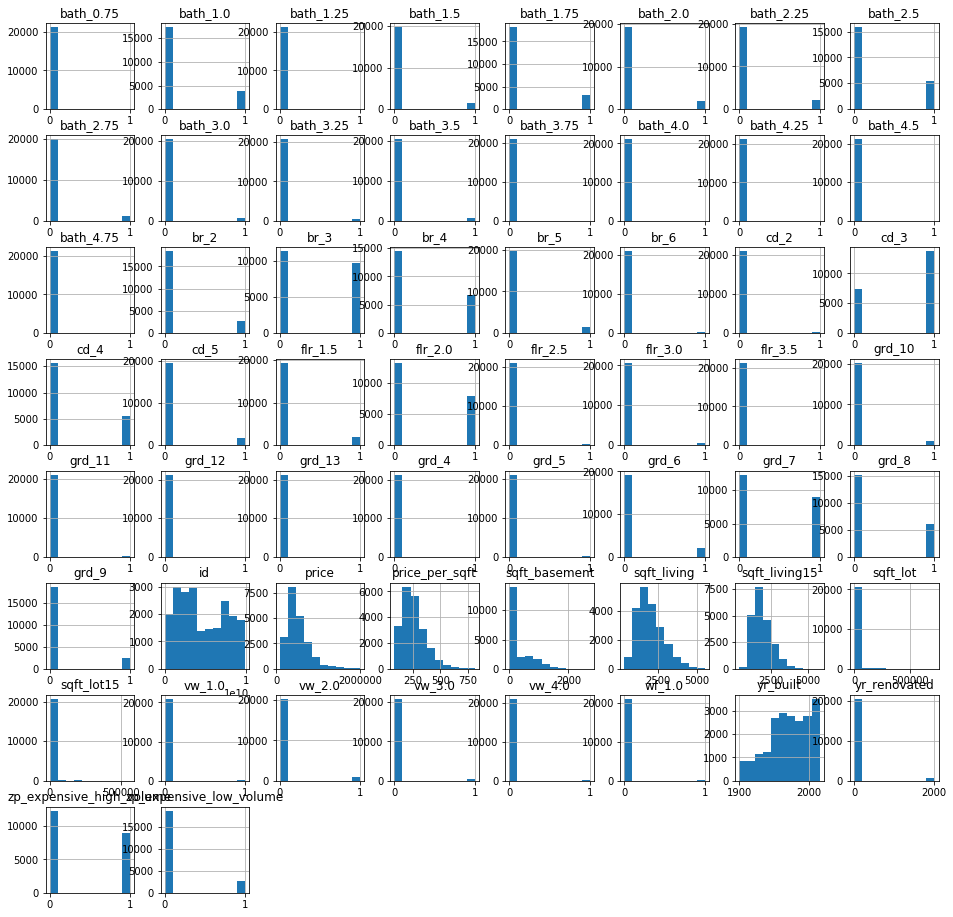

In [164]:
data.hist(figsize=(16,16))

- Grade looks normally distributed
- condition, floors, and waterfront look again to be categorical in nature
- lot of the other features do not show a strong normal distribution, so normalizing some of these may be necessary when we consider their impact.
- we see longer tails for sqft columns

Plotting Density Plot to see distribution of some of these continuous features

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


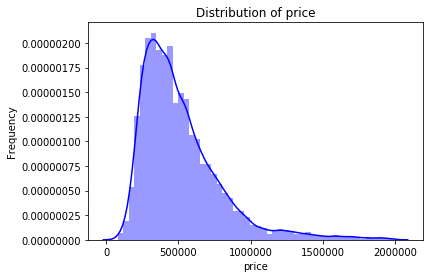

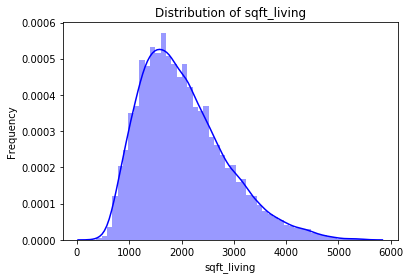

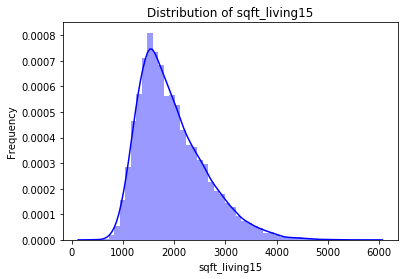

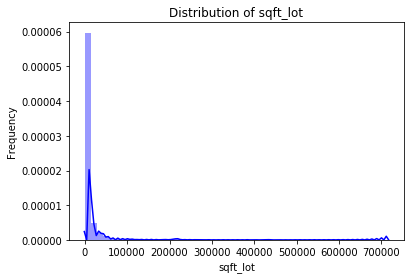

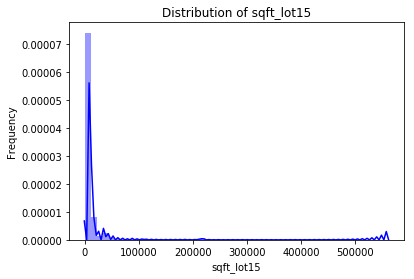

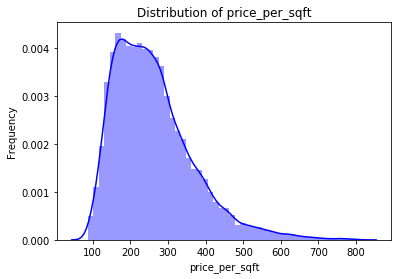

In [165]:
columns = ['price', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'price_per_sqft']
for i, col in enumerate(columns):
    plt.figure(i)
    sns.distplot(data[col], hist=True, kde=True, color='blue')
    plt.title('Distribution of ' + col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

Okay, so it looks like a lot of these square foot features are positively skewed, so we will want to normalize them before considering their candidacy in our future model.

Additionally, going to drop sqft_basement from consideration as there are a significant amount of zeros, and we are already working with a couple square feet metrics

In [166]:
data = data.drop(['sqft_basement'], axis=1)

Let's normalize these columns now then scale them

In [167]:
def log_transform(cat):
    log_cat = (cat - np.mean(cat)) / np.sqrt(np.var(cat))
    return log_cat

In [168]:
loq_price = np.log(data['price'])
log_sq_living = np.log(data['sqft_living'])
log_sq_living15 = np.log(data['sqft_living15'])
log_sq_lot = np.log(data['sqft_lot'])
log_sq_lot15 = np.log(data['sqft_lot15'])
log_ppsq = np.log(data['price_per_sqft'])

data['price'] = log_transform(log_price)
data['sqft_living'] = log_transform(log_sq_living)
data['sqft_living15'] = log_transform(log_sq_living15)
data['sqft_lot'] = log_transform(log_sq_lot)
data['sqft_lot15'] = log_transform(log_sq_lot15)
data['price_per_sqft'] = log_transform(log_ppsq)


NameError: name 'log_price' is not defined

Let's look at the density plots for these again.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


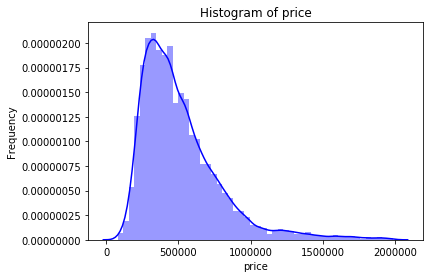

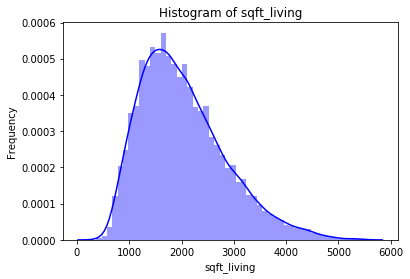

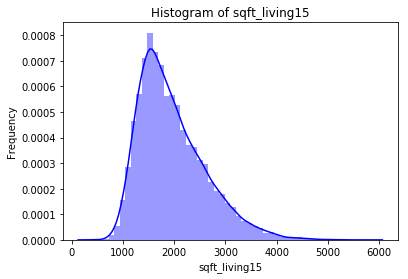

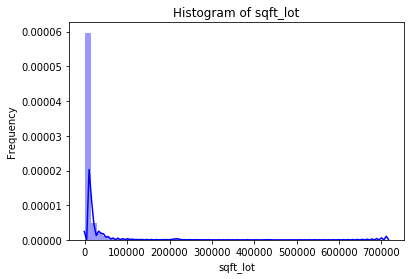

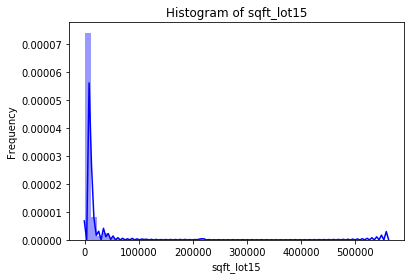

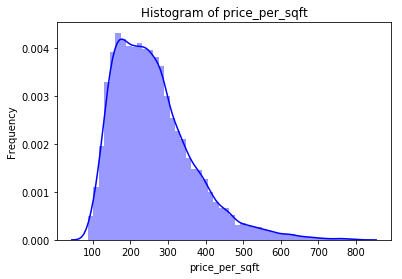

In [169]:
columns = ['price', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'price_per_sqft']
for i, col in enumerate(columns):
    plt.figure(i)
    sns.distplot(data[col], hist=True, kde=True, color='blue')
    plt.title('Histogram of ' + col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

These now look more normally distributed, though we see mini-modes for sqft_lot15 and sqft_lot, so we should keep this in mind.

In [170]:
data.describe()

,id,price,sqft_living,sqft_lot,yr_built,yr_renovated,sqft_living15,sqft_lot15,br_2,br_3,...,grd_12,grd_13,wf_1.0,vw_1.0,vw_2.0,vw_3.0,vw_4.0,price_per_sqft,zp_expensive_high_volume,zp_expensive_low_volume
count,2.122000e+04,2.122000e+04,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000,...,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000
mean,4.592244e+09,5.140820e+05,2030.140292,14285.118238,1970.891989,66.778746,1962.954571,12419.682846,0.129877,0.461169,...,0.001744,0.000047,0.004760,0.014656,0.042837,0.021772,0.011357,261.430213,0.419934,0.121819
std,2.877659e+09,2.790095e+05,820.293776,33718.567935,29.302902,358.935301,654.080995,25342.885569,0.336177,0.498502,...,0.041721,0.006865,0.068828,0.120174,0.202494,0.145941,0.105966,105.987474,0.493559,0.327084
min,1.000102e+06,7.800000e+04,370.000000,520.000000,1900.000000,0.000000,399.000000,651.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,87.588235,0.000000,0.000000
25%,2.125059e+09,3.200000e+05,1420.000000,5013.000000,1951.000000,0.000000,1480.000000,5092.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,181.805051,0.000000,0.000000
50%,3.905041e+09,4.480000e+05,1900.000000,7560.000000,1975.000000,0.000000,1830.000000,7587.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,243.690845,0.000000,0.000000
75%,7.334500e+09,6.300000e+05,2510.000000,10490.250000,1996.000000,0.000000,2330.000000,10000.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,316.176471,1.000000,0.000000
max,9.900000e+09,1.990000e+06,5490.000000,715690.000000,2015.000000,2015.000000,5790.000000,560617.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,810.138889,1.000000,1.000000


Alright, I think we've explored enough for now.  Still have not addressed year built or year renovated, but will come back to that if necessary.

# Part IV: MODELING

Now that we have normalized our continuous variables and scaled them, and have converted our categorical variables into something our model can process, I am going to a preliminary look at how well I'm doing thus far, and may return to do some more exploration.

In [171]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [176]:
linreg = LinearRegression()

In [173]:
X = data.drop(['id', 'date', 'yr_renovated', 'price'], axis=1)
y = data['price']

In [188]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21220 entries, 0 to 21219
Data columns (total 54 columns):
sqft_living                 21220 non-null int64
sqft_lot                    21220 non-null int64
yr_built                    21220 non-null int64
sqft_living15               21220 non-null int64
sqft_lot15                  21220 non-null int64
br_2                        21220 non-null uint8
br_3                        21220 non-null uint8
br_4                        21220 non-null uint8
br_5                        21220 non-null uint8
br_6                        21220 non-null uint8
bath_0.75                   21220 non-null uint8
bath_1.0                    21220 non-null uint8
bath_1.25                   21220 non-null uint8
bath_1.5                    21220 non-null uint8
bath_1.75                   21220 non-null uint8
bath_2.0                    21220 non-null uint8
bath_2.25                   21220 non-null uint8
bath_2.5                    21220 non-null uint8
bath_2.75

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [177]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [178]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [179]:
# calculating residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [180]:
from sklearn.metrics import mean_squared_error

In [182]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 6492612029.694484
Test Mean Squared Error: 5829163516.514009


In [183]:
r2 = round(linreg.score(X,y), 3)
print("R squared", r2)

R squared 0.918


In [184]:
import sklearn.metrics as metrics

In [185]:
mean_abs_err = metrics.mean_absolute_error(y_test, y_hat_test)
print("mean absolute error", mean_abs_err)

mean absolute error 50406.79374098843


In [186]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_hat_test))
print("root mean squared error", rmse)

root mean squared error 76348.95884368043


In [187]:
average_predicted_price = y_hat_test.mean()
average_actual_price = y_test.mean()
print("AVG PRED $:", average_predicted_price)
print("AVG ACT $:", average_actual_price)

AVG PRED $: 506504.8470085238
AVG ACT $: 505905.3838360038


### Interpreting Initial Results

    - R Squared: 0.921
    - Mean Absolute Error: 50,406
    - Root Mean Squared Error: 76,348
    - Average Predicted Price: 506,504
    - Average Actual Price: 505,905
    
 As RMSE (root mean square error) is a measure of how far from the regression line data points are, this means that we are about $77k off of actual house values with the current model.
    
    

In [192]:
linreg.coef_

array([ 2.29855944e+02, -5.26348479e-02, -1.21645206e+02, -6.15869685e+00,
       -8.21785252e-02,  7.62708438e+04,  1.25429511e+05,  1.21567154e+05,
        1.14568984e+05,  9.11847122e+04, -1.13523127e+05, -7.70202720e+04,
       -7.42055982e+04, -4.98349556e+04, -4.69051752e+04, -4.54677366e+04,
       -3.58031725e+04, -4.84641550e+04, -4.45802866e+04, -4.26507716e+04,
       -2.41161331e+04, -3.85353201e+04,  6.68728610e+03, -3.15193395e+04,
       -3.53650432e+04, -2.81787784e+04, -2.52532442e+04,  3.90453427e+03,
       -4.09111774e+03,  3.38510152e+04, -1.05920828e+04, -3.14724645e+04,
        1.98222100e+04, -9.96405730e+03, -1.31257172e+03,  1.29119376e+04,
        1.49787498e+05,  1.40821358e+05,  1.45569295e+05,  1.38834552e+05,
        1.47163910e+05,  1.84035135e+05,  2.44224143e+05,  3.13208168e+05,
        4.31367274e+05,  6.05244049e+05,  7.06035793e+04,  2.75911430e+04,
        1.58628575e+04,  4.27503708e+04,  8.51799071e+04,  1.70173860e+03,
        1.52658189e+04,  

In [193]:
linreg.intercept_

-370828.357128467

### Interpreting Initial Results

    - R Squared: 0.92
    - Mean Absolute Error: 48,616
    - Root Mean Squared Error: 73,913
    - Average Predicted Price: 506,974
    - Average Actual Price: 505,905

#### Stepwise Selection of features
Using this function (provided), we are going to see what the addition and subtraction of our features do to our model.

In [194]:
import statsmodels.api as sm

In [195]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [196]:
result=stepwise_selection(X, y, verbose=True)
print('resulting features:')
print(result)

Add  price_per_sqft                 with p-value 0.0
Add  grd_7                          with p-value 0.0
Add  bath_1.0                       with p-value 0.0
Add  br_2                           with p-value 0.0
Add  br_3                           with p-value 0.0
Add  grd_6                          with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  grd_8                          with p-value 8.09384e-76
Add  vw_4.0                         with p-value 7.87726e-75
Add  grd_9                          with p-value 2.14526e-62
Add  zp_expensive_low_volume        with p-value 8.60406e-45
Add  grd_5                          with p-value 2.15287e-41
Add  grd_12                         with p-value 6.51319e-38
Add  yr_built                       with p-value 6.89443e-36
Add  bath_0.75                      with p-value 7.94143e-39
Add  grd_11                         with p-value 7.68049e-35
Add  zp_expensive_high_volume       with p-value 3.80476e-29
Add  vw_3.0        

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Drop grd_7                          with p-value 0.814275
Drop grd_5                          with p-value 0.0533109
resulting features:
['price_per_sqft', 'bath_1.0', 'br_2', 'br_3', 'grd_6', 'sqft_living', 'grd_8', 'vw_4.0', 'grd_9', 'zp_expensive_low_volume', 'grd_12', 'yr_built', 'bath_0.75', 'grd_11', 'zp_expensive_high_volume', 'vw_3.0', 'br_4', 'br_5', 'br_6', 'cd_5', 'bath_3.75', 'wf_1.0', 'bath_2.5', 'sqft_lot15', 'cd_3', 'flr_2.5', 'grd_13', 'vw_1.0', 'vw_2.0', 'sqft_living15', 'bath_2.25', 'bath_3.25', 'grd_10']


The stepwise selection removed a couple of features, so let's try our regression model again with only these selected features.  Having too many features can cause overfitting.

In [197]:
stepwise_features = ['price_per_sqft', 'bath_1.0', 'br_2', 'br_3', 'grd_6', 'sqft_living', 'grd_8', 'vw_4.0', 'grd_9', 'zp_expensive_low_volume', 'grd_12', 'yr_built', 'bath_0.75', 'grd_11', 'zp_expensive_high_volume', 'vw_3.0', 'br_4', 'br_5', 'br_6', 'cd_5', 'bath_3.75', 'wf_1.0', 'bath_2.5', 'sqft_lot15', 'cd_3', 'flr_2.5', 'grd_13', 'vw_1.0', 'vw_2.0', 'sqft_living15', 'bath_2.25', 'bath_3.25', 'grd_10']

In [198]:
len(stepwise_features) # before we needed 70+, try again with these


33

So, from our stepwise iteration through our initial features, we've been able to reduce the number of feature variables to 33.

Let's run another regression and see how our model works.

In [199]:
X_new = X[stepwise_features]

In [200]:
X_new.columns

Index(['price_per_sqft', 'bath_1.0', 'br_2', 'br_3', 'grd_6', 'sqft_living',
       'grd_8', 'vw_4.0', 'grd_9', 'zp_expensive_low_volume', 'grd_12',
       'yr_built', 'bath_0.75', 'grd_11', 'zp_expensive_high_volume', 'vw_3.0',
       'br_4', 'br_5', 'br_6', 'cd_5', 'bath_3.75', 'wf_1.0', 'bath_2.5',
       'sqft_lot15', 'cd_3', 'flr_2.5', 'grd_13', 'vw_1.0', 'vw_2.0',
       'sqft_living15', 'bath_2.25', 'bath_3.25', 'grd_10'],
      dtype='object')

In [208]:
# Taking our new, smaller batch of features and testing our model
linreg2 = LinearRegression()
y = data.price
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new,y, test_size=0.2, random_state=2)

linreg2.fit(X_train2, y_train2)

y_hat_train2 = linreg2.predict(X_train2)
y_hat_test2 = linreg2.predict(X_test2)

# calculating residuals
train_residuals = y_hat_train2 - y_train2
test_residuals = y_hat_test2 - y_test2

train_mse = mean_squared_error(y_train2, y_hat_train2)
test_mse = mean_squared_error(y_test2, y_hat_test2)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

r2 = round(linreg2.score(X_new,y), 3)
print("R squared", r2)


mean_abs_err = metrics.mean_absolute_error(y_test2, y_hat_test2)
print("mean absolute error", mean_abs_err)


rmse = np.sqrt(metrics.mean_squared_error(y_test2, y_hat_test2))
print("root mean squared error", rmse)


average_predicted_price = y_hat_test2.mean()
average_actual_price = y_test2.mean()
print("AVG PRED $:", average_predicted_price)
print("AVG ACT $:", average_actual_price)


Train Mean Squared Error: 6506796616.562333
Test Mean Squared Error: 5827842513.407263
R squared 0.918
mean absolute error 50404.79300470384
root mean squared error 76340.30726560683
AVG PRED $: 506553.44871111866
AVG ACT $: 505905.3838360038


Our previous R squared was around the same, but now we have fewer features.

In [209]:
linreg2.intercept_

-219004.41542880022

In [210]:
linreg2.coef_

array([ 1.69922771e+03, -2.89837087e+04,  7.55077877e+04,  1.25177640e+05,
        6.94042008e+03,  2.30904688e+02,  7.84858651e+03,  8.52816557e+04,
        4.43651130e+04,  3.16397702e+04,  2.94233561e+05, -1.53201913e+02,
       -6.55819232e+04,  1.74441846e+05,  1.53262174e+04,  4.29752099e+04,
        1.21826314e+05,  1.15592620e+05,  9.32351234e+04,  1.39264074e+04,
        4.80957441e+04,  6.99906052e+04, -4.80993644e+03, -1.29930236e-01,
       -9.48079906e+03,  3.65767419e+04,  4.64161775e+05,  2.78832587e+04,
        1.56862733e+04, -5.90827020e+00,  8.70861672e+03,  1.78250586e+04,
        1.05226730e+05])

Negative intercept - not sure what to gather from this

Our RMSE stayed around the same at ~76000

In [211]:
import statsmodels.api as sm
XX = sm.add_constant(X_new)
model = sm.OLS(y, XX).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     7215.
Date:                Mon, 18 Mar 2019   Prob (F-statistic):               0.00
Time:                        14:05:28   Log-Likelihood:            -2.6961e+05
No. Observations:               21220   AIC:                         5.393e+05
Df Residuals:                   21186   BIC:                         5.396e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1.338e+05   5.35e+04     -2.500      0.012   -2.39e+05   -2.89e+04
price_per_sqft            1673.2814      7.917    211.365      0.000    1657.764    1688.798
bath_1.0                 -2.759e+04   1915.019    -14.408      0.000   -3.13e+04   -2.38e+04
br_2                      7.515e+04   6058.557     12.403      0.000    6.33e+04     8.7e+04
br_3                       1.22e+05   6048.328     20.177      0.000     1.1e+05    1.34e+05
grd_6                     5718.9056   2167.398      2.639      0.008    1470.641    9967.170
sqft_living                229.9188      1.486    154.759      0.000     227.007     232.831
grd_8                     8812.0960   1571.083      5.609      0.000    5732.654    1.19e+04
vw_4.0                    9.641e+04   6206.941     15.532      0.000    8.42e+04    1.09e+05
grd_9                     4.713e+04   2452.561     19.219      0.000    4.23e+04    5.19e+04
zp_expensive_low_volume   3.559e+04   2195.931     16.206      0.000    3.13e+04    3.99e+04
grd_12                    3.043e+05   1.37e+04     22.146      0.000    2.77e+05    3.31e+05
yr_built                  -192.2698     26.831     -7.166      0.000    -244.861    -139.679
bath_0.75                -6.826e+04   9867.428     -6.917      0.000   -8.76e+04   -4.89e+04
grd_11                    1.705e+05   5877.569     29.016      0.000    1.59e+05    1.82e+05
zp_expensive_high_volume  1.668e+04   1481.503     11.256      0.000    1.38e+04    1.96e+04
vw_3.0                    4.618e+04   3861.973     11.957      0.000    3.86e+04    5.37e+04
br_4                      1.186e+05   6193.520     19.143      0.000    1.06e+05    1.31e+05
br_5                      1.106e+05   6549.495     16.890      0.000    9.78e+04    1.23e+05
br_6                      9.092e+04   8140.053     11.169      0.000     7.5e+04    1.07e+05
cd_5                      1.443e+04   2254.117      6.400      0.000       1e+04    1.88e+04
bath_3.75                 5.671e+04   7198.900      7.878      0.000    4.26e+04    7.08e+04
wf_1.0                    5.917e+04   9476.055      6.244      0.000    4.06e+04    7.77e+04
bath_2.5                 -4837.4478   1527.824     -3.166      0.002   -7832.100   -1842.796
sqft_lot15                  -0.1218      0.022     -5.428      0.000      -0.166      -0.078
cd_3                     -7754.0337   1340.556     -5.784      0.000   -1.04e+04   -5126.441
flr_2.5                   3.436e+04   6845.843      5.020      0.000    2.09e+04    4.78e+04
grd_13                    4.749e+05   8.01e+04      5.928      0.000    3.18e+05    6.32e+05
vw_1.0                    2.312e+04   4611.757      5.014      0.000    1.41e+04    3.22e+04
vw_2.0                    1.361e+04   2779.505      4.897      0.000    8163.828    1.91e+04
sqft_living15 

# Part  V: Interpreting Our Data 


In [212]:
from sklearn.model_selection import cross_val_score

In [213]:
average_predicted_price = y_hat_test.mean()
average_actual_price = y_test.mean()
print("AVG PRED $:", average_predicted_price)
print("AVG ACT $:", average_actual_price)

AVG PRED $: 506504.8470085238
AVG ACT $: 505905.3838360038


In [216]:
linreg2.intercept_

-219004.41542880022

- Average Predicted Price: 506,504
- Average Actual Price: 505,905
- Intercept: -219,004
- RMSE: 76,340



Our model has an incerept, which I beleive is not ideal.  Additionally, as we can see from the statistics returned from the OLS regression results, our kurtosis is rather high at ~10



Additionally, the Jarque-Bera (JB) which is a goodness of fit test, is astronomically high.

### Cross Validation

In [217]:
score = cross_val_score(linreg2, X_new, y, cv=15, scoring="r2")
print("Cross Validation Score")
print(score)
print("*_*_*_*_*_*_*_*_")
print('Model Accuracy')
score_print = round(sum(score)/len(score),2)*100
print(score_print)

Cross Validation Score
[0.91242365 0.92345434 0.91371622 0.91675089 0.9172663  0.91387546
 0.91890099 0.91648109 0.92107328 0.90972075 0.92043379 0.92210601
 0.91233697 0.920528   0.91414021]
*_*_*_*_*_*_*_*_
Model Accuracy
92.0


## Looking Back

Given the high Jarque-Bera, skewness, and kurtosis levels, I would want to go back and further scrub our initial data, removing more outliers.

Additionally, we dropped year renovated and year built, which may change the accuracy of our model.

Also, need to better understand the model outputs to provide a better interpretation of the model.